In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel

# Create output directory for embeddings
output_dir = "paper3b_TL_/NNs"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
data = pd.read_csv('001_2802_merged_12000.csv')

# Data preprocessing
X = data['text']
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences using BERT tokenizer
def tokenize_and_encode(texts, max_len=64):
    inputs = tokenizer(
        texts.tolist(),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return inputs

# Generate BERT embeddings
def generate_embeddings(bert_model, encoded_inputs):
    outputs = bert_model(encoded_inputs['input_ids'], attention_mask=encoded_inputs['attention_mask'])
    return outputs.last_hidden_state

# Re-encode the training and test sets
X_train_encoded = tokenize_and_encode(X_train, max_len=64)
X_test_encoded = tokenize_and_encode(X_test, max_len=64)

# Generate embeddings for the training and test sets
X_train_emb = generate_embeddings(bert_model, X_train_encoded)
X_test_emb = generate_embeddings(bert_model, X_test_encoded)

# Save embeddings to disk
np.save(os.path.join(output_dir, 'BERT_X_train_emb.npy'), X_train_emb)
np.save(os.path.join(output_dir, 'BERT_X_test_emb.npy'), X_test_emb)
np.save(os.path.join(output_dir, 'BERT_y_train.npy'), y_train)
np.save(os.path.join(output_dir, 'BERT_y_test.npy'), y_test)

print("BERT embeddings saved to disk.")


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

BERT embeddings saved to disk.


In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import T5Tokenizer, TFT5EncoderModel

# Create output directory for embeddings
output_dir = "paper3b_TL_/NNs"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
data = pd.read_csv('001_2802_merged_12000.csv')

# Data preprocessing
X = data['text']
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained T5 tokenizer and model (using the encoder-only version)
tokenizer = T5Tokenizer.from_pretrained('t5-base')
t5_encoder_model = TFT5EncoderModel.from_pretrained('t5-base')

# Tokenize and encode sequences using T5 tokenizer
def tokenize_and_encode(texts, max_len=64):
    inputs = tokenizer(
        texts.tolist(),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return inputs

# Generate T5 encoder embeddings (no decoder needed)
def generate_embeddings(t5_encoder_model, encoded_inputs):
    outputs = t5_encoder_model(input_ids=encoded_inputs['input_ids'], attention_mask=encoded_inputs['attention_mask'])
    return outputs.last_hidden_state

# Re-encode the training and test sets
X_train_encoded = tokenize_and_encode(X_train, max_len=64)
X_test_encoded = tokenize_and_encode(X_test, max_len=64)

# Generate embeddings for the training and test sets using the encoder
X_train_emb = generate_embeddings(t5_encoder_model, X_train_encoded)
X_test_emb = generate_embeddings(t5_encoder_model, X_test_encoded)

# Save embeddings to disk
np.save(os.path.join(output_dir, 'T5_X_train_emb.npy'), X_train_emb)
np.save(os.path.join(output_dir, 'T5_X_test_emb.npy'), X_test_emb)
np.save(os.path.join(output_dir, 'T5_y_train.npy'), y_train)
np.save(os.path.join(output_dir, 'T5_y_test.npy'), y_test)

print("T5 embeddings saved to disk.")


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFT5EncoderModel: ['decoder.block.9.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.0.SelfAttention.k.weight', 'decoder.block.7.layer.1.EncDecAttention.k.weight', 'decoder.block.10.layer.0.SelfAttention.v.weight', 'decoder.block.8.layer.1.layer_norm.weight', 'decoder.block.10.layer.2.DenseReluDense.wo.weight', 'decoder.block.9.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.1.EncDecAttention.o.weight', 'decoder.block.7.layer.2.DenseReluDense.wo.weight', 'decoder.block.1.laye

T5 embeddings saved to disk.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import accuracy_score, classification_report

# Load the saved embeddings and labels
output_dir = "paper3b_TL_/NNs"

# BERT embeddings
X_train_bert = np.load(f"{output_dir}/BERT_X_train_emb.npy")
X_test_bert = np.load(f"{output_dir}/BERT_X_test_emb.npy")
y_train = np.load(f"{output_dir}/BERT_y_train.npy")
y_test = np.load(f"{output_dir}/BERT_y_test.npy")

# T5 embeddings
X_train_t5 = np.load(f"{output_dir}/T5_X_train_emb.npy")
X_test_t5 = np.load(f"{output_dir}/T5_X_test_emb.npy")

# Ensure the labels are in correct format
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Define the 1D CNN model for BERT embeddings
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(128, 5, activation='relu', input_shape=input_shape),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Output is float32
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create CNN models for both BERT and T5 embeddings
bert_model = create_cnn_model(X_train_bert.shape[1:])
t5_model = create_cnn_model(X_train_t5.shape[1:])

# Train the BERT model
print("Training BERT + 1D CNN model...")
bert_model.fit(X_train_bert, y_train, batch_size=16, epochs=10, validation_data=(X_test_bert, y_test), verbose=2)

# Train the T5 model
print("Training T5 + 1D CNN model...")
t5_model.fit(X_train_t5, y_train, batch_size=16, epochs=10, validation_data=(X_test_t5, y_test), verbose=2)

# Predict on test data for both models
bert_predictions = bert_model.predict(X_test_bert).ravel()
t5_predictions = t5_model.predict(X_test_t5).ravel()

# Use mean voting for final classification
mean_predictions = (bert_predictions + t5_predictions) / 2
final_predictions = (mean_predictions > 0.5).astype(int)

# Evaluate the final predictions
accuracy = accuracy_score(y_test, final_predictions)
print(f"Mean Voting Accuracy: {accuracy:.3f}")

# Classification report
report = classification_report(y_test, final_predictions, target_names=['Class 0', 'Class 1'], digits=3)
print("Classification Report:\n", report)


Training BERT + 1D CNN model...
Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


401/401 - 3s - 7ms/step - accuracy: 0.6685 - loss: 0.5943 - val_accuracy: 0.7097 - val_loss: 0.5533
Epoch 2/10
401/401 - 2s - 6ms/step - accuracy: 0.8005 - loss: 0.4506 - val_accuracy: 0.7865 - val_loss: 0.4740
Epoch 3/10
401/401 - 2s - 6ms/step - accuracy: 0.8949 - loss: 0.3141 - val_accuracy: 0.8059 - val_loss: 0.4191
Epoch 4/10
401/401 - 2s - 6ms/step - accuracy: 0.9558 - loss: 0.1937 - val_accuracy: 0.8265 - val_loss: 0.3939
Epoch 5/10
401/401 - 2s - 6ms/step - accuracy: 0.9736 - loss: 0.1245 - val_accuracy: 0.8652 - val_loss: 0.3399
Epoch 6/10
401/401 - 2s - 6ms/step - accuracy: 0.9842 - loss: 0.0835 - val_accuracy: 0.8820 - val_loss: 0.3104
Epoch 7/10
401/401 - 2s - 6ms/step - accuracy: 0.9883 - loss: 0.0615 - val_accuracy: 0.8876 - val_loss: 0.3277
Epoch 8/10
401/401 - 2s - 6ms/step - accuracy: 0.9891 - loss: 0.0568 - val_accuracy: 0.8958 - val_loss: 0.3128
Epoch 9/10
401/401 - 2s - 6ms/step - accuracy: 0.9903 - loss: 0.0519 - val_accuracy: 0.8995 - val_loss: 0.3342
Epoch 10/10


Training BERT + 1DCNN Model...
Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


401/401 - 3s - 7ms/step - accuracy: 0.6687 - loss: 0.5994 - val_accuracy: 0.7147 - val_loss: 0.5653
Epoch 2/20
401/401 - 2s - 6ms/step - accuracy: 0.8083 - loss: 0.4506 - val_accuracy: 0.7859 - val_loss: 0.4748
Epoch 3/20
401/401 - 3s - 6ms/step - accuracy: 0.8995 - loss: 0.3104 - val_accuracy: 0.8483 - val_loss: 0.4012
Epoch 4/20
401/401 - 3s - 6ms/step - accuracy: 0.9549 - loss: 0.1898 - val_accuracy: 0.8352 - val_loss: 0.4035
Epoch 5/20
401/401 - 3s - 6ms/step - accuracy: 0.9774 - loss: 0.1141 - val_accuracy: 0.8502 - val_loss: 0.3665
Epoch 6/20
401/401 - 3s - 7ms/step - accuracy: 0.9844 - loss: 0.0797 - val_accuracy: 0.8664 - val_loss: 0.3378
Epoch 7/20
401/401 - 3s - 6ms/step - accuracy: 0.9889 - loss: 0.0580 - val_accuracy: 0.8801 - val_loss: 0.3138
Epoch 8/20
401/401 - 3s - 7ms/step - accuracy: 0.9903 - loss: 0.0533 - val_accuracy: 0.8914 - val_loss: 0.3057
Epoch 9/20
401/401 - 3s - 6ms/step - accuracy: 0.9894 - loss: 0.0534 - val_accuracy: 0.8670 - val_loss: 0.3511
Epoch 10/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


401/401 - 3s - 7ms/step - accuracy: 0.6720 - loss: 0.5968 - val_accuracy: 0.7141 - val_loss: 0.5571
Epoch 2/20
401/401 - 3s - 6ms/step - accuracy: 0.8242 - loss: 0.4394 - val_accuracy: 0.8065 - val_loss: 0.4555
Epoch 3/20
401/401 - 3s - 6ms/step - accuracy: 0.9235 - loss: 0.2767 - val_accuracy: 0.8546 - val_loss: 0.3600
Epoch 4/20
401/401 - 3s - 6ms/step - accuracy: 0.9728 - loss: 0.1475 - val_accuracy: 0.8851 - val_loss: 0.3070
Epoch 5/20
401/401 - 2s - 6ms/step - accuracy: 0.9877 - loss: 0.0815 - val_accuracy: 0.8851 - val_loss: 0.2870
Epoch 6/20
401/401 - 2s - 6ms/step - accuracy: 0.9909 - loss: 0.0540 - val_accuracy: 0.8851 - val_loss: 0.3186
Epoch 7/20
401/401 - 2s - 6ms/step - accuracy: 0.9911 - loss: 0.0468 - val_accuracy: 0.8471 - val_loss: 0.3843
Epoch 8/20
401/401 - 2s - 6ms/step - accuracy: 0.9906 - loss: 0.0455 - val_accuracy: 0.8883 - val_loss: 0.3053
Epoch 9/20
401/401 - 2s - 6ms/step - accuracy: 0.9916 - loss: 0.0390 - val_accuracy: 0.8714 - val_loss: 0.3510
Epoch 10/20


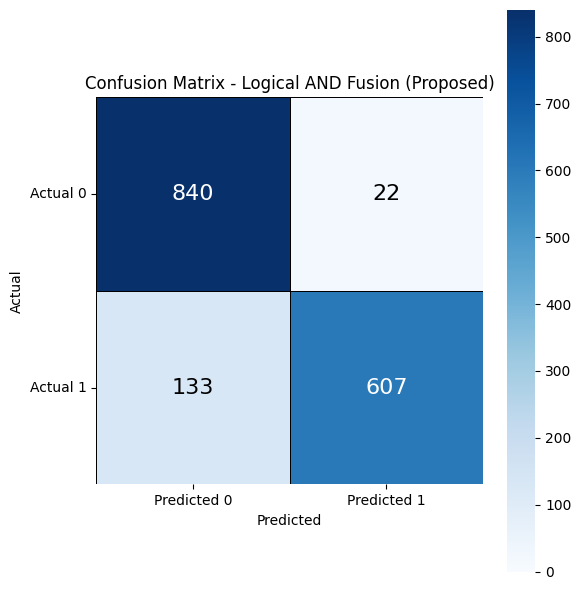

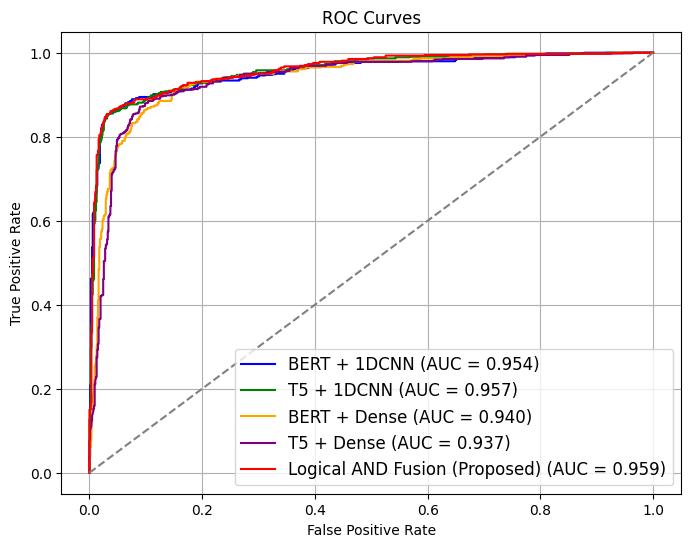

Final Model Metrics saved to paper3b_TL_Proposed\Test1_Ensamble_and_BERT_T5_1DCNN_Dense_Ablation_BERT_T5_.csv
                model  accuracy  precision    recall        F1       AUC  \
0        BERT + 1DCNN  0.900749   0.890983  0.894595  0.892785  0.954032   
1          T5 + 1DCNN  0.860799   0.801634  0.928378  0.860363  0.956893   
2        BERT + Dense  0.883271   0.877217  0.868919  0.873048  0.939877   
3          T5 + Dense  0.875780   0.841972  0.900000  0.870020  0.936821   
4  Logical AND Voting  0.903246   0.965024  0.820270  0.886779  0.958591   

  training time model size  
0     52.346608     508289  
1     50.301423     508289  
2    161.428145    6308225  
3     161.70773    6308225  
4           N/A        N/A  


In [24]:
####################################################
#Proposed
####################################################
#Test1_Ensamble_and_BERT_T5_1DCNN_Dense
import time
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
# Set output directory for results
output_dir = "paper3b_TL_Proposed"
os.makedirs(output_dir, exist_ok=True)

N_test = "Test1_Ensamble_and_BERT_T5_1DCNN_Dense"

# Load the saved embeddings
bert_X_train_emb = np.load(os.path.join(output_dir, 'BERT_X_train_emb.npy'))
bert_X_test_emb = np.load(os.path.join(output_dir, 'BERT_X_test_emb.npy'))
t5_X_train_emb = np.load(os.path.join(output_dir, 'T5_X_train_emb.npy'))
t5_X_test_emb = np.load(os.path.join(output_dir, 'T5_X_test_emb.npy'))
y_train = np.load(os.path.join(output_dir, 'BERT_y_train.npy'))  # Labels are the same for both BERT and T5
y_test = np.load(os.path.join(output_dir, 'BERT_y_test.npy'))

# Ensure labels are in the right shape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Define 1D CNN model for both BERT and T5 embeddings
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(128, 5, activation='relu', input_shape=input_shape),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Binary classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define Dense model for both BERT and T5 embeddings
def create_dense_model(input_shape):
    model = Sequential([
        Flatten(),  # Flatten the input to ensure proper input shape for Dense layers
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Binary classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize a DataFrame to store results
csv_file_path = os.path.join(output_dir, N_test + '_Ablation_BERT_T5_.csv')
columns = ['model', 'accuracy', 'precision', 'recall', 'F1', 'AUC', 'training time', 'model size']
results_df = pd.DataFrame(columns=columns)

# Function to evaluate and log model metrics
def evaluate_model_with_report(model_name, model, X_test_emb, y_test, training_time):
    # Predict probabilities
    pred_proba = model.predict(X_test_emb)
    pred = (pred_proba > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    
    # Get model size
    model_size = model.count_params()

    # Save metrics to the results dataframe
    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, auc, training_time, model_size]

    # Print classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, pred, digits=3))

    return pred, pred_proba

# Train and evaluate the BERT + 1D CNN model
print("Training BERT + 1DCNN Model...")
start_time = time.time()
bert_cnn_model = create_cnn_model(bert_X_train_emb.shape[1:])
bert_cnn_model.fit(bert_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(bert_X_test_emb, y_test), verbose=2)
bert_training_time = time.time() - start_time
bert_pred, bert_pred_proba = evaluate_model_with_report('BERT + 1DCNN', bert_cnn_model, bert_X_test_emb, y_test, bert_training_time)

# Train and evaluate the T5 + 1D CNN model
print("Training T5 + 1DCNN Model...")
start_time = time.time()
t5_cnn_model = create_cnn_model(t5_X_train_emb.shape[1:])
t5_cnn_model.fit(t5_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(t5_X_test_emb, y_test), verbose=2)
t5_training_time = time.time() - start_time
t5_pred, t5_pred_proba = evaluate_model_with_report('T5 + 1DCNN', t5_cnn_model, t5_X_test_emb, y_test, t5_training_time)

# Train and evaluate the BERT + Dense model
print("Training BERT + Dense Model...")
start_time = time.time()
bert_dense_model = create_dense_model(bert_X_train_emb.shape[1:])
bert_dense_model.fit(bert_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(bert_X_test_emb, y_test), verbose=2)
bert_dense_training_time = time.time() - start_time
bert_dense_pred, bert_dense_pred_proba = evaluate_model_with_report('BERT + Dense', bert_dense_model, bert_X_test_emb, y_test, bert_dense_training_time)

# Train and evaluate the T5 + Dense model
print("Training T5 + Dense Model...")
start_time = time.time()
t5_dense_model = create_dense_model(t5_X_train_emb.shape[1:])
t5_dense_model.fit(t5_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(t5_X_test_emb, y_test), verbose=2)
t5_dense_training_time = time.time() - start_time
t5_dense_pred, t5_dense_pred_proba = evaluate_model_with_report('T5 + Dense', t5_dense_model, t5_X_test_emb, y_test, t5_dense_training_time)

# Perform logical AND: only predict 1 if all models predict 1
final_pred = np.logical_and(np.logical_and(bert_pred, t5_pred), np.logical_and(bert_dense_pred, t5_dense_pred)).astype(int)

# Calculate and log metrics for logical AND voting
accuracy = accuracy_score(y_test, final_pred)
precision = precision_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)
auc = roc_auc_score(y_test, np.maximum(bert_pred_proba, t5_pred_proba))  # Use max probabilities for AUC calculation

# Print classification report for logical AND voting
print(f"Classification Report for Logical AND Voting:\n")
print(classification_report(y_test, final_pred, digits=3))

# Add logical AND voting results to the DataFrame
results_df.loc[len(results_df)] = ['Logical AND Voting', accuracy, precision, recall, f1, auc, 'N/A', 'N/A']

# Save the results to CSV
results_df.to_csv(csv_file_path, index=False)


#  function to plot confusion matrix with single annotations
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6, 6))
    ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues',  # Set annot=False to prevent duplicate text
                     xticklabels=['Predicted 0', 'Predicted 1'],
                     yticklabels=['Actual 0', 'Actual 1'],
                     cbar=True, square=True, linewidths=0.5, linecolor='black',
                     vmin=0, vmax=conf_matrix.max())
    
    # Loop over data dimensions and create text annotations with color adjustment
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
            ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center",
                    color=color, fontsize=16)
    
    plt.title('Confusion Matrix - Logical AND Fusion (Proposed)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_logical_and_final_no_duplicates.png'))
    plt.show()


# Compute confusion matrix for the logical AND voting predictions
conf_matrix = confusion_matrix(y_test, final_pred)


plot_confusion_matrix(conf_matrix)


# ROC curves for BERT + 1DCNN, T5 + 1DCNN, BERT + Dense, and T5 + Dense models
fpr_bert_cnn, tpr_bert_cnn, _ = roc_curve(y_test, bert_pred_proba)
fpr_t5_cnn, tpr_t5_cnn, _ = roc_curve(y_test, t5_pred_proba)
fpr_bert_dense, tpr_bert_dense, _ = roc_curve(y_test, bert_dense_pred_proba)
fpr_t5_dense, tpr_t5_dense, _ = roc_curve(y_test, t5_dense_pred_proba)
fpr_and, tpr_and, _ = roc_curve(y_test, np.maximum(bert_pred_proba, t5_pred_proba))

plt.figure(figsize=(8, 6))
plt.plot(fpr_bert_cnn, tpr_bert_cnn, label=f'BERT + 1DCNN (AUC = {roc_auc_score(y_test, bert_pred_proba):.3f})', color='blue')
plt.plot(fpr_t5_cnn, tpr_t5_cnn, label=f'T5 + 1DCNN (AUC = {roc_auc_score(y_test, t5_pred_proba):.3f})', color='green')
plt.plot(fpr_bert_dense, tpr_bert_dense, label=f'BERT + Dense (AUC = {roc_auc_score(y_test, bert_dense_pred_proba):.3f})', color='orange')
plt.plot(fpr_t5_dense, tpr_t5_dense, label=f'T5 + Dense (AUC = {roc_auc_score(y_test, t5_dense_pred_proba):.3f})', color='purple')
plt.plot(fpr_and, tpr_and, label=f'Logical AND Fusion (Proposed) (AUC = {auc:.3f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'roc_curve_comparison_logical_and.png'))
plt.show()

# Print out the final results
print(f"Final Model Metrics saved to {csv_file_path}")
print(results_df)


Training BERT + 1DCNN Model...


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
401/401 - 3s - 7ms/step - accuracy: 0.6798 - loss: 0.5912 - val_accuracy: 0.7147 - val_loss: 0.5517
Epoch 2/20
401/401 - 2s - 6ms/step - accuracy: 0.7983 - loss: 0.4583 - val_accuracy: 0.7859 - val_loss: 0.4748
Epoch 3/20
401/401 - 2s - 6ms/step - accuracy: 0.8913 - loss: 0.3224 - val_accuracy: 0.8271 - val_loss: 0.4153
Epoch 4/20
401/401 - 3s - 6ms/step - accuracy: 0.9497 - loss: 0.2038 - val_accuracy: 0.8040 - val_loss: 0.4513
Epoch 5/20
401/401 - 2s - 6ms/step - accuracy: 0.9749 - loss: 0.1255 - val_accuracy: 0.8708 - val_loss: 0.3115
Epoch 6/20
401/401 - 3s - 6ms/step - accuracy: 0.9831 - loss: 0.0857 - val_accuracy: 0.8508 - val_loss: 0.3536
Epoch 7/20
401/401 - 3s - 6ms/step - accuracy: 0.9875 - loss: 0.0674 - val_accuracy: 0.8858 - val_loss: 0.3035
Epoch 8/20
401/401 - 3s - 6ms/step - accuracy: 0.9900 - loss: 0.0507 - val_accuracy: 0.8308 - val_loss: 0.4745
Epoch 9/20
401/401 - 3s - 6ms/step - accuracy: 0.9888 - loss: 0.0528 - val_accuracy: 0.8340 - val_loss: 0.4321
E

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
401/401 - 3s - 8ms/step - accuracy: 0.6793 - loss: 0.5897 - val_accuracy: 0.7029 - val_loss: 0.5546
Epoch 2/20
401/401 - 3s - 6ms/step - accuracy: 0.8373 - loss: 0.4222 - val_accuracy: 0.7921 - val_loss: 0.4536
Epoch 3/20
401/401 - 3s - 7ms/step - accuracy: 0.9308 - loss: 0.2548 - val_accuracy: 0.8745 - val_loss: 0.3427
Epoch 4/20
401/401 - 3s - 6ms/step - accuracy: 0.9781 - loss: 0.1304 - val_accuracy: 0.8727 - val_loss: 0.2999
Epoch 5/20
401/401 - 3s - 7ms/step - accuracy: 0.9906 - loss: 0.0704 - val_accuracy: 0.8933 - val_loss: 0.2882
Epoch 6/20
401/401 - 3s - 6ms/step - accuracy: 0.9897 - loss: 0.0540 - val_accuracy: 0.8914 - val_loss: 0.2891
Epoch 7/20
401/401 - 3s - 7ms/step - accuracy: 0.9925 - loss: 0.0424 - val_accuracy: 0.9070 - val_loss: 0.3015
Epoch 8/20
401/401 - 3s - 6ms/step - accuracy: 0.9899 - loss: 0.0475 - val_accuracy: 0.8951 - val_loss: 0.3128
Epoch 9/20
401/401 - 3s - 6ms/step - accuracy: 0.9913 - loss: 0.0418 - val_accuracy: 0.8533 - val_loss: 0.3787
E

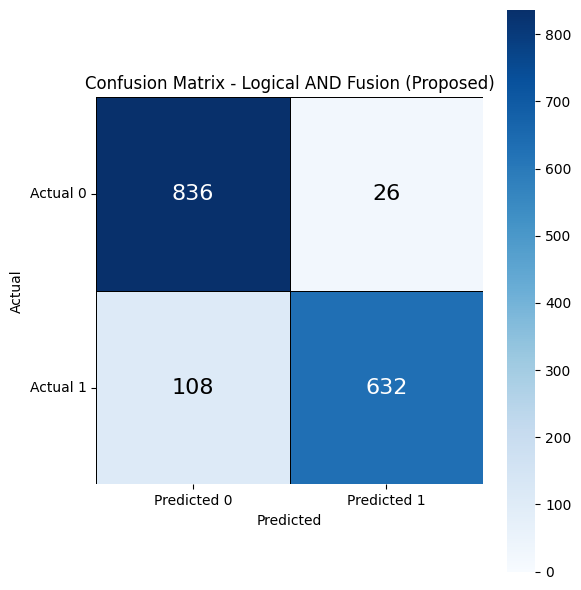

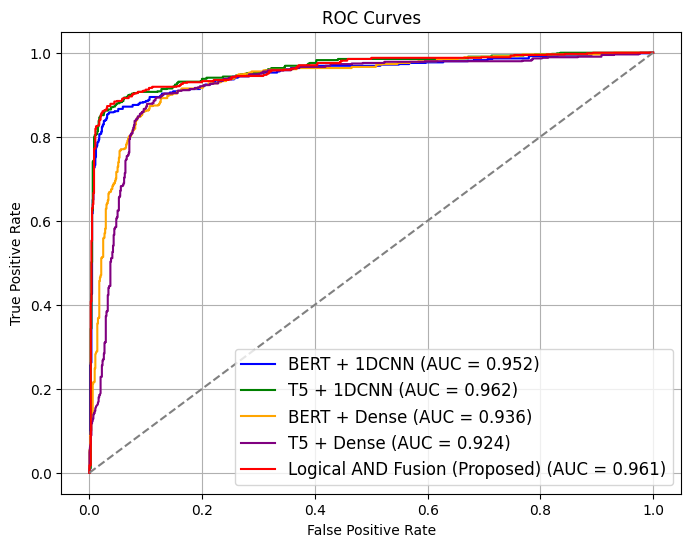

Final Model Metrics saved to paper3b_TL_Proposed\Test1_Ensamble_and_BERT_T5_1DCNN_Dense_Ablation_BERT_T5_.csv
                model  accuracy  precision    recall        F1       AUC  \
0        BERT + 1DCNN  0.890137   0.871053  0.894595  0.882667  0.952000   
1          T5 + 1DCNN  0.883271   0.836784  0.928378  0.880205  0.961951   
2        BERT + Dense  0.872035   0.826618  0.914865  0.868505  0.935526   
3          T5 + Dense  0.885768   0.868874  0.886486  0.877592  0.924411   
4  Logical AND Voting  0.916355   0.960486  0.854054  0.904149  0.960808   

  training time model size  
0     51.263806     508289  
1     52.080594     508289  
2    161.383311    6308225  
3    163.710005    6308225  
4           N/A        N/A  


In [31]:
####################################################
#Proposed############################################################################################################
####################################################
#Test1_Ensamble_and_BERT_T5_1DCNN_Dense
import time
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
# Set output directory for results
output_dir = "paper3b_TL_Proposed"
os.makedirs(output_dir, exist_ok=True)

N_test = "Test1_Ensamble_and_BERT_T5_1DCNN_Dense"

# Load the saved embeddings
bert_X_train_emb = np.load(os.path.join(output_dir, 'BERT_X_train_emb.npy'))
bert_X_test_emb = np.load(os.path.join(output_dir, 'BERT_X_test_emb.npy'))
t5_X_train_emb = np.load(os.path.join(output_dir, 'T5_X_train_emb.npy'))
t5_X_test_emb = np.load(os.path.join(output_dir, 'T5_X_test_emb.npy'))
y_train = np.load(os.path.join(output_dir, 'BERT_y_train.npy'))  # Labels are the same for both BERT and T5
y_test = np.load(os.path.join(output_dir, 'BERT_y_test.npy'))

# Ensure labels are in the right shape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Define 1D CNN model for both BERT and T5 embeddings
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(128, 5, activation='relu', input_shape=input_shape),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Binary classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define Dense model for both BERT and T5 embeddings
def create_dense_model(input_shape):
    model = Sequential([
        Flatten(),  # Flatten the input to ensure proper input shape for Dense layers
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Binary classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize a DataFrame to store results
csv_file_path = os.path.join(output_dir, N_test + '_Ablation_BERT_T5_.csv')
columns = ['model', 'accuracy', 'precision', 'recall', 'F1', 'AUC', 'training time', 'model size']
results_df = pd.DataFrame(columns=columns)

# Function to evaluate and log model metrics
def evaluate_model_with_report(model_name, model, X_test_emb, y_test, training_time):
    # Predict probabilities
    pred_proba = model.predict(X_test_emb)
    pred = (pred_proba > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    
    # Get model size
    model_size = model.count_params()

    # Save metrics to the results dataframe
    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, auc, training_time, model_size]

    # Print classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, pred, digits=3))

    return pred, pred_proba

# Train and evaluate the BERT + 1D CNN model
print("Training BERT + 1DCNN Model...")
start_time = time.time()
bert_cnn_model = create_cnn_model(bert_X_train_emb.shape[1:])
bert_cnn_model.fit(bert_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(bert_X_test_emb, y_test), verbose=2)
bert_training_time = time.time() - start_time
bert_pred, bert_pred_proba = evaluate_model_with_report('BERT + 1DCNN', bert_cnn_model, bert_X_test_emb, y_test, bert_training_time)

# Train and evaluate the T5 + 1D CNN model
print("Training T5 + 1DCNN Model...")
start_time = time.time()
t5_cnn_model = create_cnn_model(t5_X_train_emb.shape[1:])
t5_cnn_model.fit(t5_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(t5_X_test_emb, y_test), verbose=2)
t5_training_time = time.time() - start_time
t5_pred, t5_pred_proba = evaluate_model_with_report('T5 + 1DCNN', t5_cnn_model, t5_X_test_emb, y_test, t5_training_time)

# Train and evaluate the BERT + Dense model
print("Training BERT + Dense Model...")
start_time = time.time()
bert_dense_model = create_dense_model(bert_X_train_emb.shape[1:])
bert_dense_model.fit(bert_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(bert_X_test_emb, y_test), verbose=2)
bert_dense_training_time = time.time() - start_time
bert_dense_pred, bert_dense_pred_proba = evaluate_model_with_report('BERT + Dense', bert_dense_model, bert_X_test_emb, y_test, bert_dense_training_time)

# Train and evaluate the T5 + Dense model
print("Training T5 + Dense Model...")
start_time = time.time()
t5_dense_model = create_dense_model(t5_X_train_emb.shape[1:])
t5_dense_model.fit(t5_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(t5_X_test_emb, y_test), verbose=2)
t5_dense_training_time = time.time() - start_time
t5_dense_pred, t5_dense_pred_proba = evaluate_model_with_report('T5 + Dense', t5_dense_model, t5_X_test_emb, y_test, t5_dense_training_time)

# Perform logical AND: only predict 1 if all models predict 1
final_pred = np.logical_and(np.logical_and(bert_pred, t5_pred), np.logical_and(bert_dense_pred, t5_dense_pred)).astype(int)

# Calculate and log metrics for logical AND voting
accuracy = accuracy_score(y_test, final_pred)
precision = precision_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)
auc = roc_auc_score(y_test, np.maximum(bert_pred_proba, t5_pred_proba))  # Use max probabilities for AUC calculation

# Print classification report for logical AND voting
print(f"Classification Report for Logical AND Voting:\n")
print(classification_report(y_test, final_pred, digits=3))

# Add logical AND voting results to the DataFrame
results_df.loc[len(results_df)] = ['Logical AND Voting', accuracy, precision, recall, f1, auc, 'N/A', 'N/A']

# Save the results to CSV
results_df.to_csv(csv_file_path, index=False)


#  function to plot confusion matrix with single annotations
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6, 6))
    ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues',  # Set annot=False to prevent duplicate text
                     xticklabels=['Predicted 0', 'Predicted 1'],
                     yticklabels=['Actual 0', 'Actual 1'],
                     cbar=True, square=True, linewidths=0.5, linecolor='black',
                     vmin=0, vmax=conf_matrix.max())
    
    # Loop over data dimensions and create text annotations with color adjustment
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
            ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center",
                    color=color, fontsize=16)
    
    plt.title('Confusion Matrix - Logical AND Fusion (Proposed)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_logical_and_final_no_duplicates.png'))
    plt.show()


# Compute confusion matrix for the logical AND voting predictions
conf_matrix = confusion_matrix(y_test, final_pred)


plot_confusion_matrix(conf_matrix)


# ROC curves for BERT + 1DCNN, T5 + 1DCNN, BERT + Dense, and T5 + Dense models
fpr_bert_cnn, tpr_bert_cnn, _ = roc_curve(y_test, bert_pred_proba)
fpr_t5_cnn, tpr_t5_cnn, _ = roc_curve(y_test, t5_pred_proba)
fpr_bert_dense, tpr_bert_dense, _ = roc_curve(y_test, bert_dense_pred_proba)
fpr_t5_dense, tpr_t5_dense, _ = roc_curve(y_test, t5_dense_pred_proba)
fpr_and, tpr_and, _ = roc_curve(y_test, np.maximum(bert_pred_proba, t5_pred_proba))

plt.figure(figsize=(8, 6))
plt.plot(fpr_bert_cnn, tpr_bert_cnn, label=f'BERT + 1DCNN (AUC = {roc_auc_score(y_test, bert_pred_proba):.3f})', color='blue')
plt.plot(fpr_t5_cnn, tpr_t5_cnn, label=f'T5 + 1DCNN (AUC = {roc_auc_score(y_test, t5_pred_proba):.3f})', color='green')
plt.plot(fpr_bert_dense, tpr_bert_dense, label=f'BERT + Dense (AUC = {roc_auc_score(y_test, bert_dense_pred_proba):.3f})', color='orange')
plt.plot(fpr_t5_dense, tpr_t5_dense, label=f'T5 + Dense (AUC = {roc_auc_score(y_test, t5_dense_pred_proba):.3f})', color='purple')
plt.plot(fpr_and, tpr_and, label=f'Logical AND Fusion (Proposed) (AUC = {auc:.3f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'roc_curve_comparison_logical_and.png'))
plt.show()

# Print out the final results
print(f"Final Model Metrics saved to {csv_file_path}")
print(results_df)
